In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [33]:
ndvi = pd.read_csv('hacktrain.csv')
pd.set_option('display.max_columns', None)
ndvi.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,20150109_N,20141117_N,20141101_N,20141016_N,20140930_N,20140813_N,20140626_N,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,-1325.64,-944.084,277.107,-206.7990,536.441,749.348,NaN,492.001,655.770,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,-1408.64,-989.285,214.200,-75.5979,893.439,401.281,-389.933,394.053,666.603,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,-3162.14,NaN,433.396,228.1530,555.359,530.936,952.178,-1074.760,NaN,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,-2829.40,-1267.540,461.025,317.5210,404.898,563.716,1232.120,-117.779,682.559,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,1242.87,-2646.050,-1238.020,1564.3900,NaN,890.149,410.200,1160.250,NaN,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [34]:
ndvi.drop('Unnamed: 0', axis=1, inplace=True)

In [35]:
ndvi.shape

(8000, 29)

In [36]:
ndvi.describe()

,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,20150109_N,20141117_N,20141101_N,20141016_N,20140930_N,20140813_N,20140626_N,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,7360.000000,6960.000000,7120.000000,6720.000000,7600.000000,6560.000000,7200.000000,7440.000000,6400.000000,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,4320.961814,5237.037739,2217.826698,3262.549896,2613.621603,2801.923271,2416.228527,1570.869960,2990.753932,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,2807.501097,2762.489857,2207.585070,2651.324362,2292.517077,2460.409767,2430.158541,1055.588553,1692.904375,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,-3403.050000,-2849.860000,-3099.710000,-1570.780000,-86.018000,-1633.980000,-456.557000,-1137.170000,414.145000,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,1377.927500,2638.000000,566.290500,1044.472500,581.532000,954.652000,503.752000,714.746250,1538.412500,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,4497.485000,6518.745000,1195.960000,2206.985000,1696.485000,1602.145000,1165.685000,1292.640000,2693.335000,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,7217.497500,7585.817500,3207.695000,5463.485000,4549.082500,4056.042500,4134.417500,2047.507500,4252.880000,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,8422.060000,8401.100000,8477.560000,8592.410000,7913.820000,8630.420000,8210.230000,5606.310000,7492.230000,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


In [37]:
ndvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          8000 non-null   int64  
 1   class       8000 non-null   object 
 2   20150720_N  7440 non-null   float64
 3   20150602_N  6800 non-null   float64
 4   20150517_N  7200 non-null   float64
 5   20150501_N  7040 non-null   float64
 6   20150415_N  7520 non-null   float64
 7   20150330_N  6880 non-null   float64
 8   20150314_N  7280 non-null   float64
 9   20150226_N  6640 non-null   float64
 10  20150210_N  7360 non-null   float64
 11  20150125_N  6960 non-null   float64
 12  20150109_N  7120 non-null   float64
 13  20141117_N  6720 non-null   float64
 14  20141101_N  7600 non-null   float64
 15  20141016_N  6560 non-null   float64
 16  20140930_N  7200 non-null   float64
 17  20140813_N  7440 non-null   float64
 18  20140626_N  6400 non-null   float64
 19  20140610_N  7520 non-null  

<Axes: >

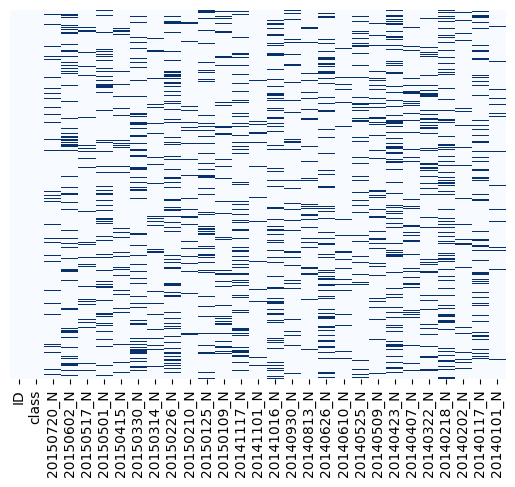

In [38]:
sns.heatmap(ndvi.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels= ndvi.columns )

In [39]:
class_wise_mean= ndvi.groupby('class').mean()
class_wise_mean

,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,20150109_N,20141117_N,20141101_N,20141016_N,20140930_N,20140813_N,20140626_N,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,
farm,9046.983353,4838.358110,4088.156539,3315.449643,4294.568257,2069.495380,5174.748287,4371.350702,5073.297611,3438.326385,3353.282666,1669.158446,2818.534023,2536.220699,1914.007388,2313.267887,1356.981548,3698.497201,4001.665328,3505.647655,3912.410764,3797.566496,2137.602876,2040.181438,1213.645559,5431.663844,1484.822420,2698.899910
forest,3917.805975,6356.317985,5298.687946,4992.698499,5727.660693,3192.693152,5254.827392,3329.078205,5400.247251,4699.087095,5882.931161,2439.626861,3422.661832,2671.641979,2959.315472,2490.840553,1667.601184,3021.456429,5352.051984,3892.083492,2995.358316,3164.814156,2147.093943,3168.901456,2458.607325,6870.548767,2887.924264,2689.646378
grass,10086.030612,6134.092898,5285.997174,3911.453406,4502.239751,3443.556032,5285.228719,4354.356983,4539.132160,5435.237888,5637.839886,1895.510569,4159.202094,3749.616737,5073.300105,2729.121903,1584.014242,3567.532844,4157.858128,3842.829354,3255.850380,2632.223452,1864.914834,1648.582851,1191.557461,5849.064124,3447.606485,3800.040735
impervious,8663.094170,2821.777111,2139.427155,1703.133611,2075.706549,1789.481355,2097.014217,1905.891489,1861.231092,2101.294420,2296.265361,1210.395093,2248.894448,1947.724797,2149.272276,1897.092078,929.395477,1760.133684,2326.799494,2180.882020,2144.276743,1461.677426,1123.753846,1005.585795,876.051986,2413.830570,1685.555382,1385.175715
orchard,9607.533333,6941.269655,5129.554760,4749.299269,7041.720000,1361.621731,5517.736364,2594.968583,5034.744960,4637.071357,5617.598077,973.409500,4005.926208,2700.089448,1766.184083,4226.192000,2094.216100,3414.536583,3539.080261,4922.323556,4407.285464,5139.575455,2257.341107,2508.110091,2475.882040,6742.948966,1738.431192,3599.083533
water,787.076190,2455.548344,1628.972375,1101.121938,1406.143650,1037.900596,931.040746,1131.306331,527.135156,1098.995648,1082.290640,928.772583,2088.938558,1875.839566,647.585941,942.176744,1462.542030,2505.037316,2013.680657,1517.887576,1217.060015,887.448339,1127.101172,987.976689,880.756213,1674.185549,973.156134,206.950290


In [40]:
for col in ndvi.columns:
    if col in ['ID', 'class']:
        continue

    means= ndvi.groupby('class')[col].mean()
    
    for cls in ndvi['class'].unique():
        cls_mean = means[cls]
        ndvi.loc[ (ndvi['class']==cls) & (ndvi[col].isna()) , col ] = cls_mean

<Axes: >

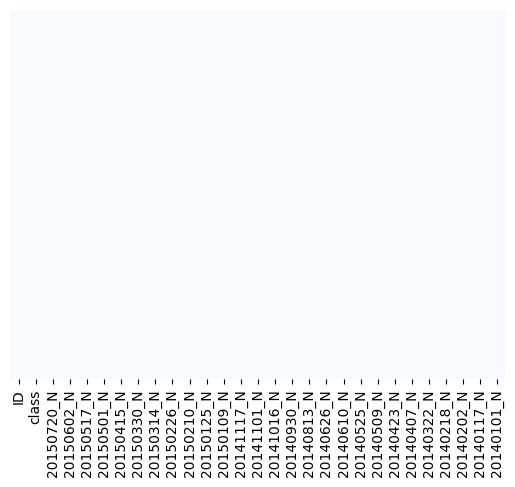

In [41]:
sns.heatmap(ndvi.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels= ndvi.columns )

In [61]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [62]:
x_train= ndvi.drop(['ID','class'], axis=1)         #feature cols

y_train= LabelEncoder().fit_transform(ndvi['class'])       #target col

In [63]:
pipeline= Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(multi_class='auto', max_iter=1000))
])

pipeline.fit(x_train, y_train)


C:\Users\nidhi\anaconda3\envs\Data_Science\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=1000, multi_class='auto'))])

In [64]:
test =pd.read_csv('hacktest.csv')
test.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,20150109_N,20141117_N,20141101_N,20141016_N,20140930_N,20140813_N,20140626_N,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,2829.13,6742.570,879.812,5276.290,592.313,950.125,5509.46,1970.850,3628.950,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,7268.22,6908.180,535.296,7425.840,1905.260,1655.730,3123.39,748.992,967.298,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,7002.63,6086.560,522.798,7317.650,1309.160,1629.130,4334.83,745.727,983.231,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,2176.80,690.408,1675.450,812.751,976.340,1080.470,3146.34,2949.470,5877.270,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,7951.44,8001.350,550.508,7734.130,2230.530,1633.580,4345.24,700.491,1353.270,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [65]:
x_test= test.drop(['Unnamed: 0', 'ID'] ,axis=1)
y_pred= pipeline.predict(x_test)

In [67]:
y_pred

array([4, 1, 4, ..., 5, 5, 3])

<Axes: ylabel='count'>

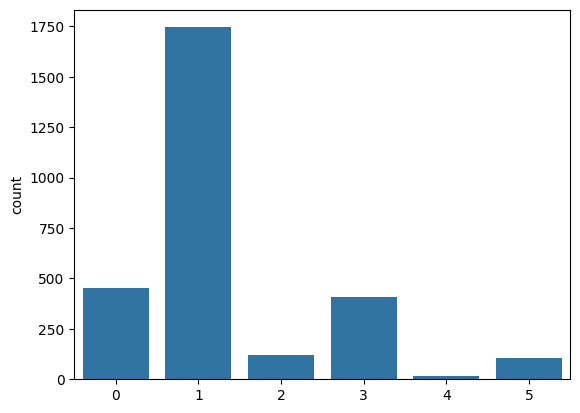

In [68]:
sns.countplot(x=y_pred)

In [79]:
y_pred[0:100]

array([4, 1, 4, 1, 4, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 4, 1, 4, 1, 4, 1,
       4, 5, 5, 5, 5, 1, 5, 5, 5, 0, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 3, 5, 3, 5, 5, 5, 3, 5, 3, 5, 5, 3, 5, 5, 5, 5,
       5, 5, 3, 1, 5, 5, 5, 5, 5, 0, 5, 1, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       3, 3, 3, 5, 3, 5, 5, 5, 5, 5, 5, 3])

In [80]:
#converting codes backs to original labels 
le= LabelEncoder()
le.fit(ndvi['class'])
y_pred_labels = le.inverse_transform(y_pred)

In [81]:
submission= pd.DataFrame( { 'ID': test['ID'], 'class': y_pred_labels})

In [82]:
submission 

,ID,class
0,1,orchard
1,2,forest
2,3,orchard
3,4,forest
4,5,orchard
...,...,...
2840,2841,water
2841,2842,impervious
2842,2843,water
2843,2844,water


In [87]:
submission.to_csv('ndvi-prediction.csv', index=False)

In [88]:
import os
print(os.getcwd())

C:\Users\nidhi
